# Depth-first search (DFS) 

Depth-first search enumerates paths (from the source node) until it finds a solution (target node) prioritizing the deepest (longest) paths and limiting the maximum depth (only finite paths).

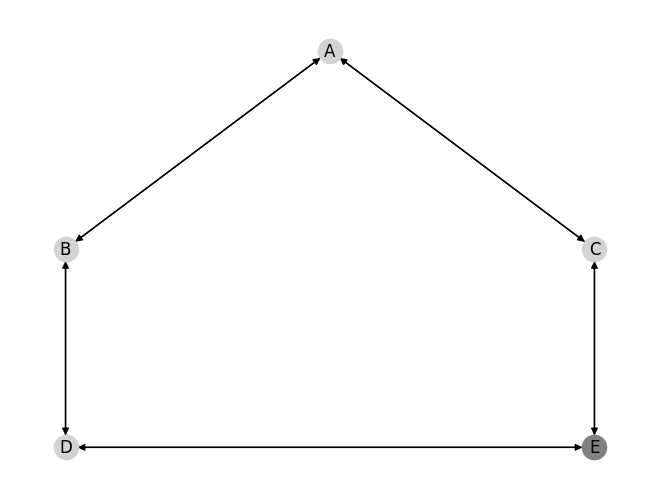

In [2]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D'],'C':['A','E'], 'D':['B','E'],'E':['C','D']}
source='A'
Target=['E']
nxG=nx.DiGraph(G)
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
#pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot',root=source)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray")
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray')


## DFS algorithm with maximum depth m (iterative version - tree search)
DFS(G,s',m)  
> Open = InitStack(s')  
> while Open $\neq \emptyset$  
>>  s = Pop(Open)  
>>  if Target(s) return s  
>>  if Depth(s) < m return s  
>>  for n $\in$ Adjacents(G,s)  
>>>   Push(Open,n)    
> return NULL

### DFS implementation returning the target node that was reached

In [3]:
# G is a graph represented as an adjancency list. 
# source is the label (string) of the source node
# Target is the list of target nodes
def dfs(G, source, m, Target):
  Open = [source]
  Depth = {}; Depth[source] = 0
  while Open != []:
    s = Open.pop(-1)
    if s in Target: return s
    if Depth[s]+1 < m:
      for n in G[s]:
        Open.append(n)
        Depth[n] = Depth[s]+1
  return None
      
print(dfs(G,'A',3,Target))

E


### DFS implementation graphically showing the sequence of nodes visited

E


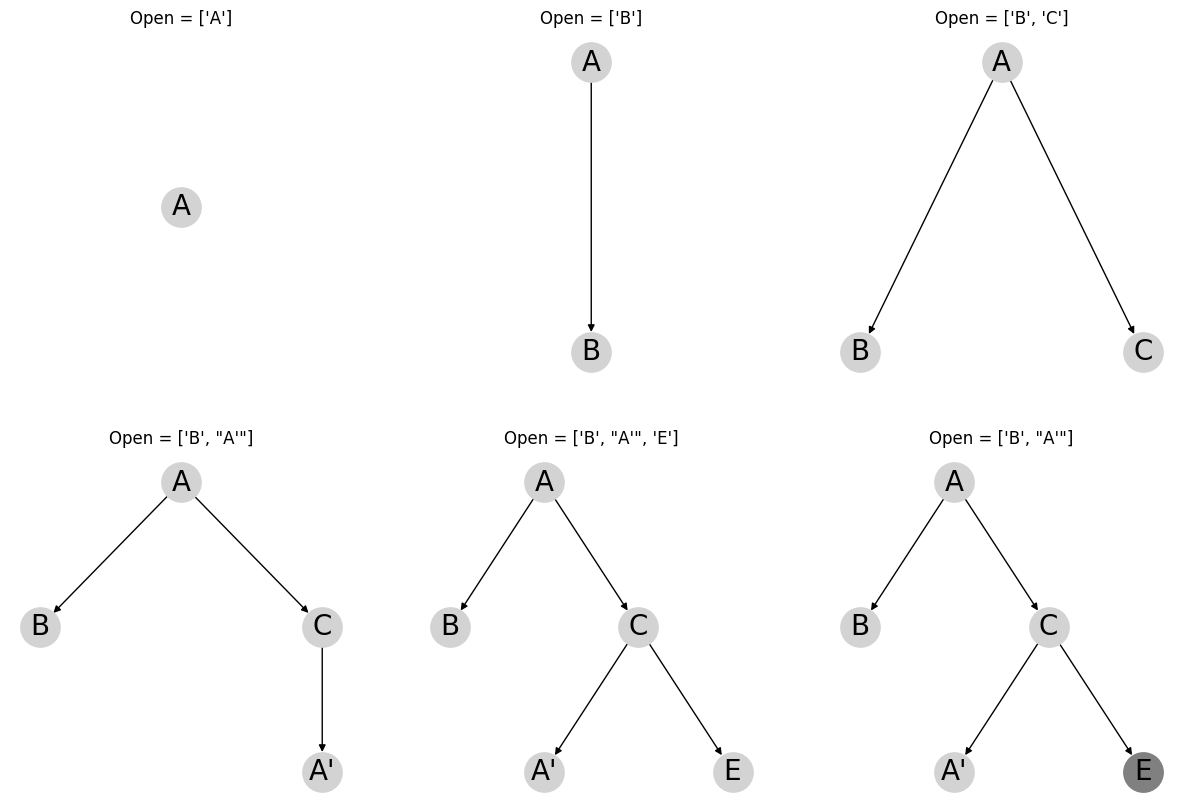

In [5]:
import matplotlib.pyplot as plt

nrows=2; ncols=3
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = iter(fig.axes)

def draw_graph(DG, source, Open, target=[],):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  ax.set_title("Open = "+str(Open))
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG,prog='dot',root=source)
  nx.draw(nxDG,pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, ax=ax, nodelist=target, node_color='gray', node_size=800)

def dfs(G, source, m, Target):
  DG={source:[]}
  Open = [source]
  Depth = {}; Depth[source] = 0
  draw_graph(DG, source, Open)
  while Open != []:
    s = Open.pop(-1)
    if s[0] in Target: 
      draw_graph(DG, source, Open, [s])
      return s
    if Depth[s]+1 < m:
      Adj = DG[s]
      for n in G[s[0]]:
        while n in DG: n+="'"
        Open.append(n)
        Depth[n] = Depth[s]+1        
        Adj.append(n); DG[s]=Adj; DG.update({n:[]})
        draw_graph(DG, source, Open)
  return None
      
print(dfs(G,'A',3,Target))

DFS incomplete and suboptimal  

**Complexity**: G with branching factor $b$ and depth $m$ 
  
  $O(b^m)$ temporal cost and $O(bm)$ spatial cost